## 1. Data understanding, data preparation and feature engineering

### 1.1 Understand the Data

In [172]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = None

In [173]:
# Importing all datasets
app_data = pd.read_csv("applications_base.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [174]:
bureau_data = pd.read_csv("bureau.csv")
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [175]:
app_data.shape, bureau_data.shape

((307511, 122), (1716428, 17))

In [176]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [177]:
bureau_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


### 1.2 Handling missing values

In [178]:
# Checking null values 

app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [179]:
null_col = pd.DataFrame(app_data.isnull().sum().sort_values()/len(app_data)*100)
null_col.rename(columns={0:'Null_Percentage'},inplace=True)
null_col

,Null_Percentage
SK_ID_CURR,0.000000
HOUR_APPR_PROCESS_START,0.000000
REG_REGION_NOT_WORK_REGION,0.000000
LIVE_REGION_NOT_WORK_REGION,0.000000
REG_CITY_NOT_LIVE_CITY,0.000000
REG_CITY_NOT_WORK_CITY,0.000000
LIVE_CITY_NOT_WORK_CITY,0.000000
ORGANIZATION_TYPE,0.000000
FLAG_DOCUMENT_21,0.000000
FLAG_DOCUMENT_20,0.000000


In [180]:
# Removing null columns with >= 40% null values

app_data = app_data.drop(columns=null_col[null_col['Null_Percentage']>=40].index)
app_data.shape

(307511, 73)

In [181]:
# Checking null values in bureau dataset

null_col_bureau = pd.DataFrame(bureau_data.isnull().sum().sort_values()/len(bureau_data)*100)
null_col_bureau.rename(columns={0:'Null_Percentage'},inplace=True)
null_col_bureau

,Null_Percentage
SK_ID_CURR,0.000000
SK_ID_BUREAU,0.000000
CREDIT_ACTIVE,0.000000
CREDIT_CURRENCY,0.000000
DAYS_CREDIT,0.000000
CREDIT_DAY_OVERDUE,0.000000
DAYS_CREDIT_UPDATE,0.000000
CNT_CREDIT_PROLONG,0.000000
AMT_CREDIT_SUM_OVERDUE,0.000000
CREDIT_TYPE,0.000000


In [182]:
# Removing null columns with >= 40% null values

bureau_data = bureau_data.drop(columns=null_col_bureau[null_col_bureau['Null_Percentage']>=40].index)
bureau_data.shape

(1716428, 15)

In [183]:
# Imputing missing values in application data

num_cols = app_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = app_data.select_dtypes(include=['object']).columns

num_cols_with_na = [col for col in num_cols if app_data[col].isnull().sum() > 0]
cat_cols_with_na = [col for col in cat_cols if app_data[col].isnull().sum() > 0]

print("Numerical Columns with Missing Values:")
print(num_cols_with_na)
print("\nCategorical Columns with Missing Values:")
print(cat_cols_with_na)


Numerical Columns with Missing Values:
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Categorical Columns with Missing Values:
['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']


In [184]:
# Impute numerical columns
for col in num_cols_with_na:
    if app_data[col].skew() > 1:  # Check for skewness
        app_data[col].fillna(app_data[col].median(), inplace=True)
    else:
        app_data[col].fillna(app_data[col].mean(), inplace=True)


In [185]:
# Impute categorical columns
for col in cat_cols_with_na:
    app_data[col].fillna(app_data[col].mode()[0], inplace=True)


In [186]:
# Check for any remaining missing values
print("Remaining Missing Values:")
print(app_data.isnull().sum().sort_values(ascending=False).head(20))


Remaining Missing Values:
SK_ID_CURR                  0
REG_CITY_NOT_WORK_CITY      0
FLAG_DOCUMENT_8             0
FLAG_DOCUMENT_7             0
FLAG_DOCUMENT_6             0
FLAG_DOCUMENT_5             0
FLAG_DOCUMENT_4             0
FLAG_DOCUMENT_3             0
FLAG_DOCUMENT_2             0
DAYS_LAST_PHONE_CHANGE      0
DEF_60_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_30_CNT_SOCIAL_CIRCLE    0
EXT_SOURCE_3                0
EXT_SOURCE_2                0
ORGANIZATION_TYPE           0
FLAG_DOCUMENT_9             0
FLAG_DOCUMENT_10            0
FLAG_DOCUMENT_11            0
dtype: int64


In [187]:
# Identify numerical and categorical columns with missing values in bureau_data
num_cols_bureau = bureau_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols_bureau = bureau_data.select_dtypes(include=['object']).columns

num_cols_with_na_bureau = [col for col in num_cols_bureau if bureau_data[col].isnull().sum() > 0]
cat_cols_with_na_bureau = [col for col in cat_cols_bureau if bureau_data[col].isnull().sum() > 0]

print("Numerical Columns with Missing Values in Bureau Data:")
print(num_cols_with_na_bureau)
print("\nCategorical Columns with Missing Values in Bureau Data:")
print(cat_cols_with_na_bureau)


Numerical Columns with Missing Values in Bureau Data:
['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT']

Categorical Columns with Missing Values in Bureau Data:
[]


In [188]:
# Impute numerical columns in bureau_data
for col in num_cols_with_na_bureau:
    if bureau_data[col].skew() > 1:  # Check for skewness
        bureau_data[col].fillna(bureau_data[col].median(), inplace=True)
    else:
        bureau_data[col].fillna(bureau_data[col].mean(), inplace=True)


In [189]:
# Check for any remaining missing values in bureau_data
print("Remaining Missing Values in Bureau Data:")
print(bureau_data.isnull().sum().sort_values(ascending=False).head(20))


Remaining Missing Values in Bureau Data:
SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_LIMIT      0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64


### 1.3 Feature engineering

In [190]:
# Define aggregations for numerical columns
aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'sum'],  # Days before application the previous credit was taken
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],        # Max overdue days
    'CNT_CREDIT_PROLONG': ['sum'],               # Count of prolongations
    'AMT_CREDIT_SUM': ['min', 'max', 'mean', 'sum'],  # Total current credit amount
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],    # Total debt
    'AMT_CREDIT_SUM_OVERDUE': ['max', 'sum'],         # Total overdue amount
}

In [191]:
# Group by SK_ID_CURR and apply aggregations
bureau_agg = bureau_data.groupby('SK_ID_CURR').agg(aggregations)

In [192]:
# Flatten column names
bureau_agg.columns = ['_'.join(col).strip() for col in bureau_agg.columns]

In [193]:
# Reset index to make SK_ID_CURR a column again
bureau_agg.reset_index(inplace=True)

In [194]:
print("Aggregated Bureau Data:")
bureau_agg.head()

Aggregated Bureau Data:


,SK_ID_CURR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_mean,DAYS_CREDIT_sum,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_mean,CNT_CREDIT_PROLONG_sum,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum
0,100001,-1572,-49,-735.000000,-5145,0,0.0,0,85500.0,378000.0,207623.571429,1453365.000,373239.0,85240.928571,596686.5,0.0,0.0
1,100002,-1437,-103,-874.000000,-6992,0,0.0,0,0.0,450000.0,108131.945625,865055.565,245781.0,30722.625000,245781.0,0.0,0.0
2,100003,-2586,-606,-1400.750000,-5603,0,0.0,0,22248.0,810000.0,254350.125000,1017400.500,0.0,0.000000,0.0,0.0,0.0
3,100004,-1326,-408,-867.000000,-1734,0,0.0,0,94500.0,94537.8,94518.900000,189037.800,0.0,0.000000,0.0,0.0,0.0
4,100005,-373,-62,-190.666667,-572,0,0.0,0,29826.0,568800.0,219042.000000,657126.000,543087.0,189469.500000,568408.5,0.0,0.0


In [195]:
# Add derived ratio features
bureau_agg['DEBT_CREDIT_RATIO'] = bureau_agg['AMT_CREDIT_SUM_DEBT_sum'] / bureau_agg['AMT_CREDIT_SUM_sum']
bureau_agg['OVERDUE_CREDIT_RATIO'] = bureau_agg['AMT_CREDIT_SUM_OVERDUE_sum'] / bureau_agg['AMT_CREDIT_SUM_sum']

# Handle division by zero
bureau_agg.fillna(0, inplace=True)


In [196]:
# Active and closed loans count
bureau_active = bureau_data[bureau_data['CREDIT_ACTIVE'] == 'Active']
bureau_closed = bureau_data[bureau_data['CREDIT_ACTIVE'] == 'Closed']

active_counts = bureau_active.groupby('SK_ID_CURR').size().rename('ACTIVE_LOANS_COUNT')
closed_counts = bureau_closed.groupby('SK_ID_CURR').size().rename('CLOSED_LOANS_COUNT')

# Merge active and closed counts with bureau_agg
bureau_agg = bureau_agg.merge(active_counts, on='SK_ID_CURR', how='left')
bureau_agg = bureau_agg.merge(closed_counts, on='SK_ID_CURR', how='left')

# Fill missing values with 0
bureau_agg[['ACTIVE_LOANS_COUNT', 'CLOSED_LOANS_COUNT']] = bureau_agg[['ACTIVE_LOANS_COUNT', 'CLOSED_LOANS_COUNT']].fillna(0)

# Calculate proportion of active to total loans
bureau_agg['ACTIVE_LOANS_RATIO'] = bureau_agg['ACTIVE_LOANS_COUNT'] / (bureau_agg['ACTIVE_LOANS_COUNT'] + bureau_agg['CLOSED_LOANS_COUNT'])
bureau_agg['ACTIVE_LOANS_RATIO'].fillna(0, inplace=True)


In [197]:
print("Final Bureau Aggregated Data:")
bureau_agg.head()


Final Bureau Aggregated Data:


,SK_ID_CURR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_mean,DAYS_CREDIT_sum,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_mean,CNT_CREDIT_PROLONG_sum,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum,DEBT_CREDIT_RATIO,OVERDUE_CREDIT_RATIO,ACTIVE_LOANS_COUNT,CLOSED_LOANS_COUNT,ACTIVE_LOANS_RATIO
0,100001,-1572,-49,-735.000000,-5145,0,0.0,0,85500.0,378000.0,207623.571429,1453365.000,373239.0,85240.928571,596686.5,0.0,0.0,0.410555,0.0,3.0,4.0,0.428571
1,100002,-1437,-103,-874.000000,-6992,0,0.0,0,0.0,450000.0,108131.945625,865055.565,245781.0,30722.625000,245781.0,0.0,0.0,0.284122,0.0,2.0,6.0,0.250000
2,100003,-2586,-606,-1400.750000,-5603,0,0.0,0,22248.0,810000.0,254350.125000,1017400.500,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,3.0,0.250000
3,100004,-1326,-408,-867.000000,-1734,0,0.0,0,94500.0,94537.8,94518.900000,189037.800,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.000000
4,100005,-373,-62,-190.666667,-572,0,0.0,0,29826.0,568800.0,219042.000000,657126.000,543087.0,189469.500000,568408.5,0.0,0.0,0.864992,0.0,2.0,1.0,0.666667


In [198]:
# Select only numeric columns
numeric_data = app_data.select_dtypes(include=[float, int])

# Compute correlations
if 'TARGET' in numeric_data.columns:
    correlations = numeric_data.corr()['TARGET'].abs().sort_values(ascending=False)
    print(correlations)
else:
    print("The 'TARGET' column is not in the numeric data.")


TARGET                         1.000000
EXT_SOURCE_2                   0.160303
EXT_SOURCE_3                   0.157397
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039623
REGION_POPULATION_RELATIVE     0.037227
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
DEF_60_CNT_SOCIAL_CIRCLE       0.031401
AMT_CREDIT                     0.030369
FLAG_DOCUMENT_6                0.028602
FLAG_WORK_PHONE                0.028524
HOUR_APPR_PROCESS_START        0.024166
FLAG_PHONE                     0.023806
CNT_CHILDREN                   0.019187


In [199]:
# Threshold for removing features
correlation_threshold = 0.01
low_correlation_cols = correlations[correlations < correlation_threshold].index.tolist()

print("Low Correlation Columns:", low_correlation_cols)

Low Correlation Columns: ['FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_18', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'AMT_INCOME_TOTAL', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_17', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_4', 'SK_ID_CURR', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_19', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_DOCUMENT_12', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_20', 'AMT_REQ_CREDIT_BUREAU_HOUR']


In [200]:
app_data.shape

(307511, 73)

In [201]:
# Exclude 'SK_ID_CURR' from being dropped
if 'SK_ID_CURR' in low_correlation_cols:
    low_correlation_cols.remove('SK_ID_CURR')

print("Low Correlation Columns (excluding 'SK_ID_CURR'):", low_correlation_cols)

Low Correlation Columns (excluding 'SK_ID_CURR'): ['FLAG_DOCUMENT_14', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_18', 'REG_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_15', 'AMT_REQ_CREDIT_BUREAU_QRT', 'REG_REGION_NOT_LIVE_REGION', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'AMT_INCOME_TOTAL', 'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_17', 'LIVE_REGION_NOT_WORK_REGION', 'FLAG_DOCUMENT_4', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_DAY', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_19', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'FLAG_DOCUMENT_12', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_20', 'AMT_REQ_CREDIT_BUREAU_HOUR']


In [202]:
# Drop low correlation columns
app_data = app_data.drop(columns=low_correlation_cols)

In [203]:
app_data.shape

(307511, 43)

In [204]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,Laborers,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,-1134.0,1,0,0,0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,Core staff,1,1,MONDAY,11,0,0,0,School,0.622246,0.510853,0.0,0.0,-828.0,1,0,0,0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,Laborers,2,2,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,-815.0,0,0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,0.510853,0.0,0.0,-617.0,1,0,0,0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,Core staff,2,2,THURSDAY,11,0,1,1,Religion,0.322738,0.510853,0.0,0.0,-1106.0,0,0,0,0,0.0,0.0


In [205]:
print("Application Data Unique IDs:", app_data['SK_ID_CURR'].nunique())
print("Bureau Data Unique IDs:", bureau_agg['SK_ID_CURR'].nunique())


Application Data Unique IDs: 307511
Bureau Data Unique IDs: 305811


In [206]:
# Check for duplicates in SK_ID_CURR in both datasets
print("Duplicates in app_data SK_ID_CURR:", app_data['SK_ID_CURR'].duplicated().sum())
print("Duplicates in bureau_agg SK_ID_CURR:", bureau_agg['SK_ID_CURR'].duplicated().sum())


Duplicates in app_data SK_ID_CURR: 0
Duplicates in bureau_agg SK_ID_CURR: 0


In [207]:
# Merge app_data with bureau_agg
merged_data = app_data.merge(bureau_agg, on='SK_ID_CURR', how='left')

print("Shape of merged data:", merged_data.shape)


Shape of merged data: (307511, 64)


In [208]:
# Fill missing values in bureau_agg features
merged_data.fillna(0, inplace=True)  # Replace NaN with 0, assuming no bureau data implies no activity


In [209]:
# Check merged data
print("Final merged data shape:", merged_data.shape)
print("Merged data sample:")
merged_data.head()


Final merged data shape: (307511, 64)
Merged data sample:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_mean,DAYS_CREDIT_sum,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_mean,CNT_CREDIT_PROLONG_sum,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum,DEBT_CREDIT_RATIO,OVERDUE_CREDIT_RATIO,ACTIVE_LOANS_COUNT,CLOSED_LOANS_COUNT,ACTIVE_LOANS_RATIO
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,Laborers,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,-1134.0,1,0,0,0,0.0,1.0,-1437.0,-103.0,-874.00,-6992.0,0.0,0.0,0.0,0.0,450000.0,108131.945625,865055.565,245781.0,30722.625,245781.0,0.0,0.0,0.284122,0.0,2.0,6.0,0.25
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,Core staff,1,1,MONDAY,11,0,0,0,School,0.622246,0.510853,0.0,0.0,-828.0,1,0,0,0,0.0,0.0,-2586.0,-606.0,-1400.75,-5603.0,0.0,0.0,0.0,22248.0,810000.0,254350.125000,1017400.500,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,1.0,3.0,0.25
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,Laborers,2,2,MONDAY,9,0,0,0,Government,0.555912,0.729567,0.0,0.0,-815.0,0,0,0,0,0.0,0.0,-1326.0,-408.0,-867.00,-1734.0,0.0,0.0,0.0,94500.0,94537.8,94518.900000,189037.800,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,2.0,0.00
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,Business Entity Type 3,0.650442,0.510853,0.0,0.0,-617.0,1,0,0,0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,Core staff,2,2,THURSDAY,11,0,1,1,Religion,0.322738,0.510853,0.0,0.0,-1106.0,0,0,0,0,0.0,0.0,-1149.0,-1149.0,-1149.00,-1149.0,0.0,0.0,0.0,146250.0,146250.0,146250.000000,146250.000,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.00


### 1.4 Feature Scaling and Encoding

In [210]:
# Replace infinite values with NaN
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [211]:
# Identify missing values
missing_cols = merged_data.columns[merged_data.isnull().any()]
print(f"Columns with missing values: {missing_cols}")

if len(missing_cols) > 0:
    print(f"Total missing values: {merged_data.isnull().sum().sum()}")
    print("Replacing missing values (NaN) with column means...")
    
    # Replace NaN values with column means for numerical columns only
    for col in missing_cols:
        if merged_data[col].dtype in ['int64', 'float64']:  # Check for numeric columns
            mean_value = np.nanmean(merged_data[col])
            merged_data[col].fillna(mean_value, inplace=True)
        else:
            print(f"Skipping non-numeric column: {col}")

    print("Missing values replaced successfully.")

else:
    print("No missing values found.")


Columns with missing values: Index(['DEBT_CREDIT_RATIO', 'OVERDUE_CREDIT_RATIO'], dtype='object')
Total missing values: 64
Replacing missing values (NaN) with column means...
Missing values replaced successfully.


In [212]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-Hot Encoding for categorical variables
categorical_cols = merged_data.select_dtypes(include=['object']).columns
merged_data = pd.get_dummies(merged_data, columns=categorical_cols, drop_first=True)

# Min-Max Scaling for numerical features
scaler = MinMaxScaler()
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
merged_data[numerical_cols] = scaler.fit_transform(merged_data[numerical_cols])

print("Data after encoding and scaling:")
merged_data.head()


Data after encoding and scaling:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_mean,DAYS_CREDIT_sum,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_mean,CNT_CREDIT_PROLONG_sum,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum,DEBT_CREDIT_RATIO,OVERDUE_CREDIT_RATIO,ACTIVE_LOANS_COUNT,CLOSED_LOANS_COUNT,ACTIVE_LOANS_RATIO,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Servic

In [213]:
# Convert True/False columns to 1/0
bool_cols = merged_data.select_dtypes(include=['bool']).columns
merged_data[bool_cols] = merged_data[bool_cols].astype(int)

print("Boolean columns converted to integers:")
merged_data.head()

Boolean columns converted to integers:


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_mean,DAYS_CREDIT_sum,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_mean,CNT_CREDIT_PROLONG_sum,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_sum,DEBT_CREDIT_RATIO,OVERDUE_CREDIT_RATIO,ACTIVE_LOANS_COUNT,CLOSED_LOANS_COUNT,ACTIVE_LOANS_RATIO,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Servic

In [214]:
merged_data.shape

(307511, 164)

## 2. Exploratory Data Analysis (EDA)
Understand the relationship between features and the target variable (TARGET).

### 2.1 Correlation Analysis: Identified top correlated features.

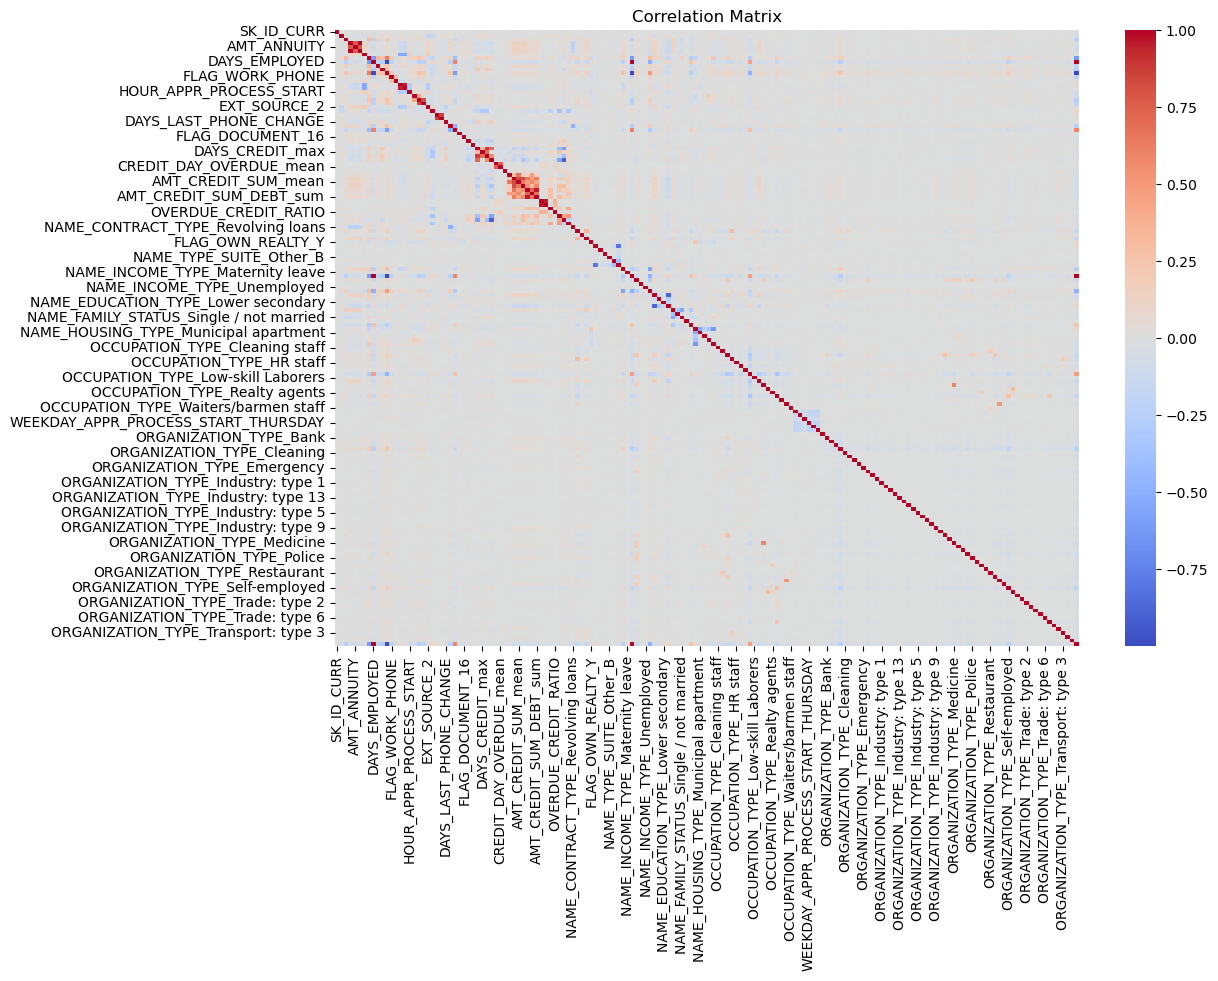

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


In [216]:
# Feature Importance (correlation with TARGET)
target_corr = merged_data.corr()['TARGET'].sort_values(ascending=False)
print("Top features correlated with TARGET:")
print(target_corr.head(10))

Top features correlated with TARGET:
TARGET                         1.000000
DAYS_CREDIT_mean               0.083960
DAYS_BIRTH                     0.078239
DAYS_CREDIT_min                0.072869
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
NAME_INCOME_TYPE_Working       0.057481
DAYS_LAST_PHONE_CHANGE         0.055218
CODE_GENDER_M                  0.054713
DAYS_CREDIT_max                0.052740
Name: TARGET, dtype: float64


### 2.2 Handling outliers

In [217]:
# Select numerical columns
numerical_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns

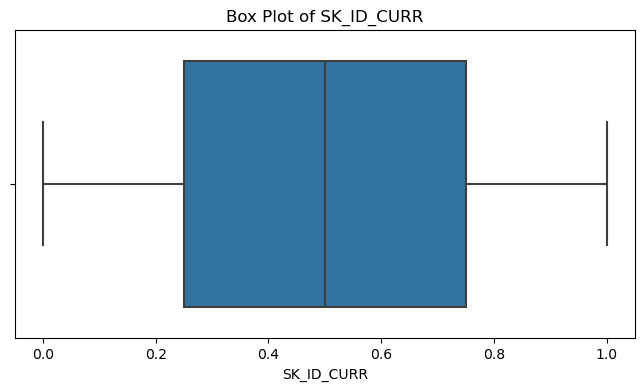

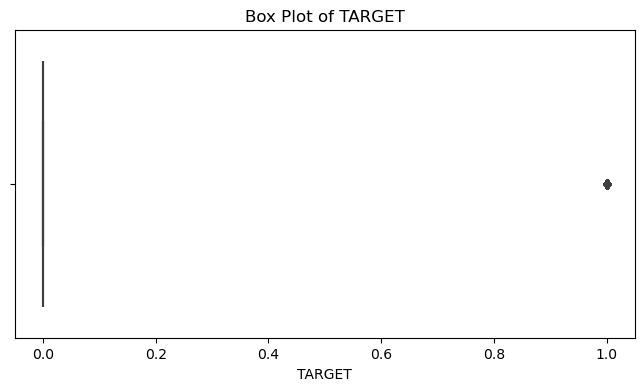

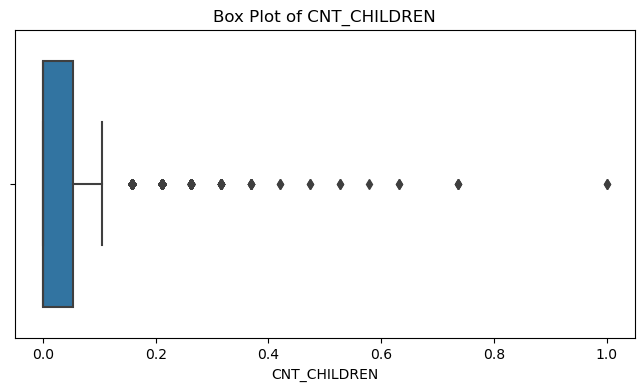

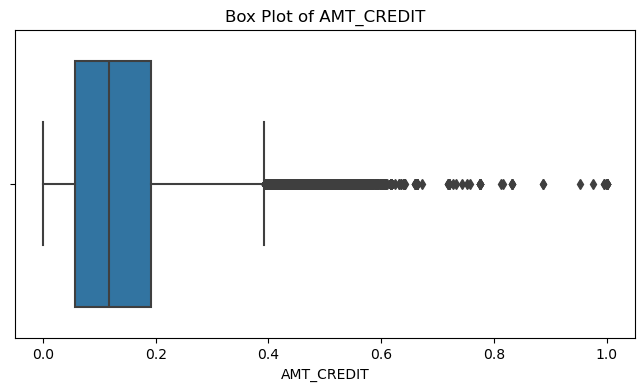

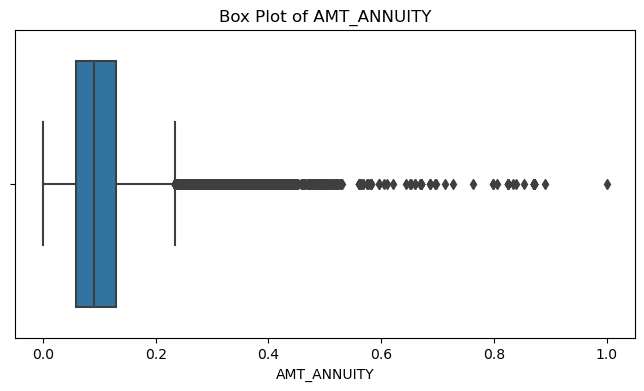

In [218]:
# Visualize outliers using box plots for selected columns
for col in numerical_cols[:5]:  # Plotting for the first 5 numerical columns
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=merged_data[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [219]:
# Lets keep the data as it can reveal crucial insights

## 3. Model development. 


In [220]:
from sklearn.model_selection import train_test_split

# Split features and target variable
X = merged_data.drop(columns=['TARGET', 'SK_ID_CURR'])
y = merged_data['TARGET']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

Shape of training set: (246008, 162)
Shape of testing set: (61503, 162)


### 3.1 Logistic Regression Model

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [222]:
# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_proba_lr = log_reg.predict_proba(X_test)[:, 1]


In [223]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89     56554
         1.0       0.16      0.35      0.22      4949

    accuracy                           0.80     61503
   macro avg       0.55      0.60      0.55     61503
weighted avg       0.87      0.80      0.83     61503

ROC-AUC Score: 0.6702680421603178


### 3.2 Decision Tree

In [224]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth=5, min_samples_split=10)
dt.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]


In [225]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     56554
         1.0       0.12      0.47      0.20      4949

    accuracy                           0.69     61503
   macro avg       0.53      0.59      0.50     61503
weighted avg       0.87      0.69      0.76     61503

ROC-AUC Score: 0.6501332118570983


### 3.3 Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

In [227]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     56554
         1.0       0.27      0.05      0.08      4949

    accuracy                           0.91     61503
   macro avg       0.60      0.52      0.52     61503
weighted avg       0.87      0.91      0.88     61503

ROC-AUC Score: 0.7030097827847225


## 4. Model selection

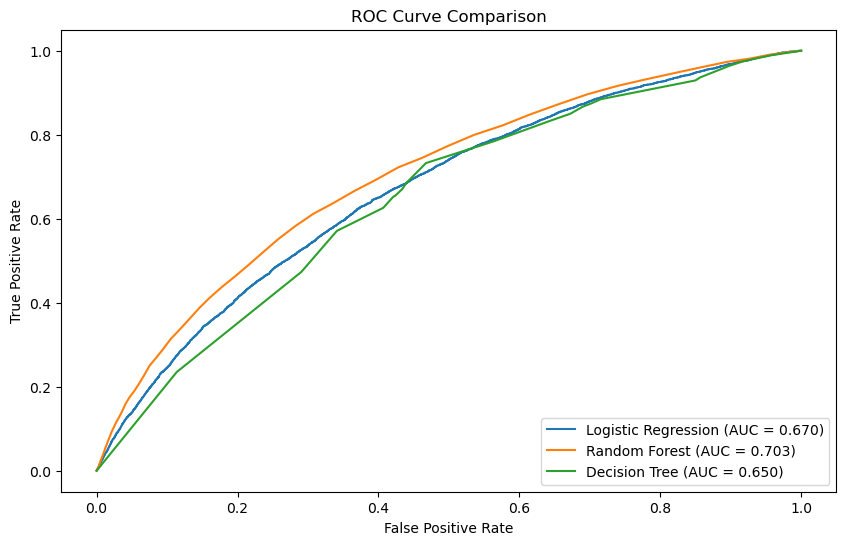

In [228]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_pred_proba_dt):.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()


In [230]:
# Feature importance from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [231]:
# Display top 10 features
print("Top 10 Features by Importance:")
print(feature_importances.head(10))


Top 10 Features by Importance:
                        Feature  Importance
28   AMT_REQ_CREDIT_BUREAU_YEAR    0.060437
0                  CNT_CHILDREN    0.058301
19                 EXT_SOURCE_3    0.052061
18                 EXT_SOURCE_2    0.050896
47           ACTIVE_LOANS_COUNT    0.047383
48           CLOSED_LOANS_COUNT    0.029332
20     DEF_30_CNT_SOCIAL_CIRCLE    0.028717
3               AMT_GOODS_PRICE    0.028278
13  REGION_RATING_CLIENT_W_CITY    0.026425
22       DAYS_LAST_PHONE_CHANGE    0.026046


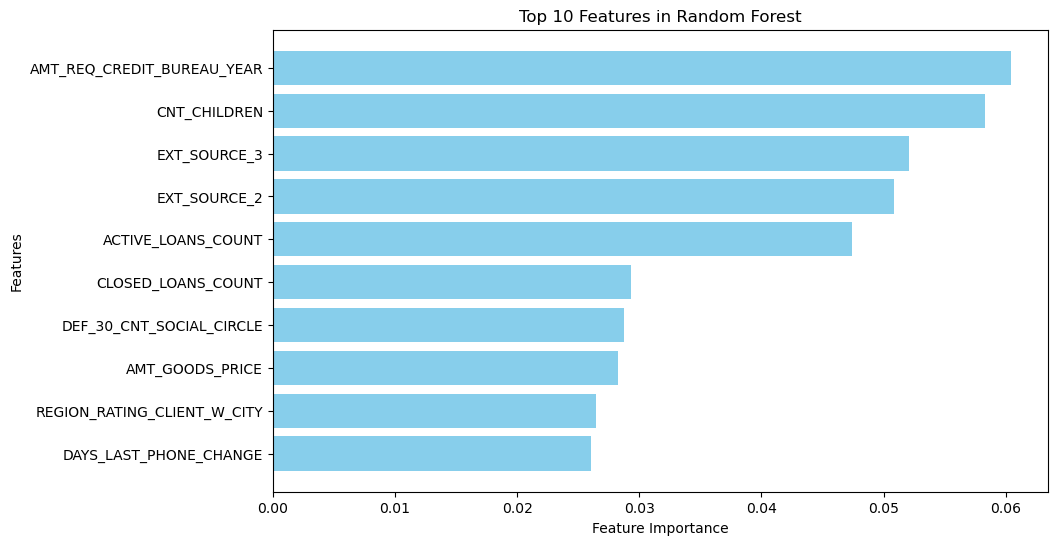

In [232]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10][::-1], feature_importances['Importance'][:10][::-1], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top 10 Features in Random Forest")
plt.show()

## 5. Business impact and recommendations 

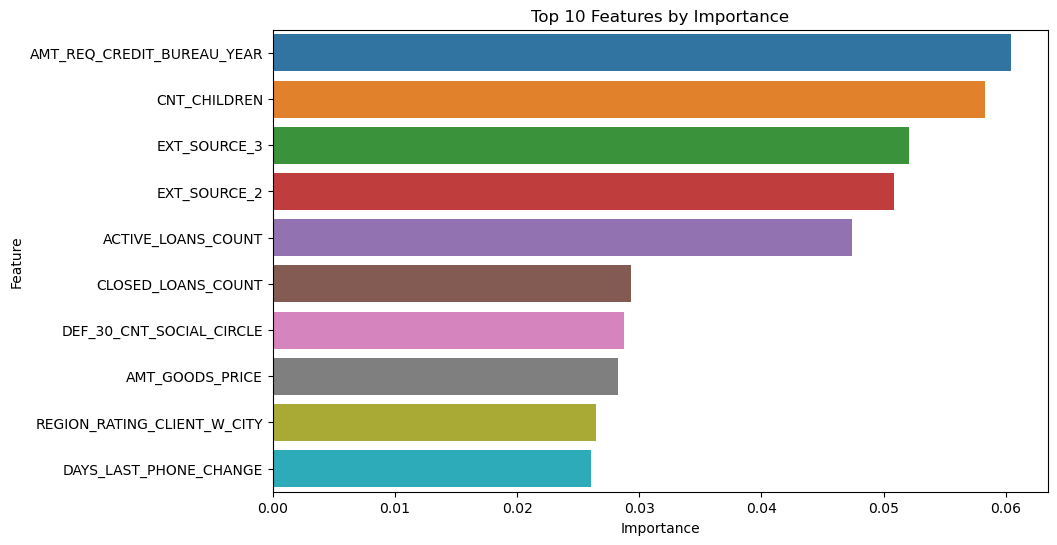

In [243]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importances['Importance'].head(10),
    y=feature_importances['Feature'].head(10),
)
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### High-Risk Applicants:
Stricter lending terms (e.g., higher interest rates, smaller loan amounts).
Increased scrutiny on payment history and income stability.

### Low-Risk Applicants:
Proactive targeting with larger loan amounts or longer terms.
Incentives like lower interest rates.

### Threshold-Based Decisioning:
Approve: Probability > 0.8
Manual Review: 0.5 – 0.8
Reject: Probability < 0.5

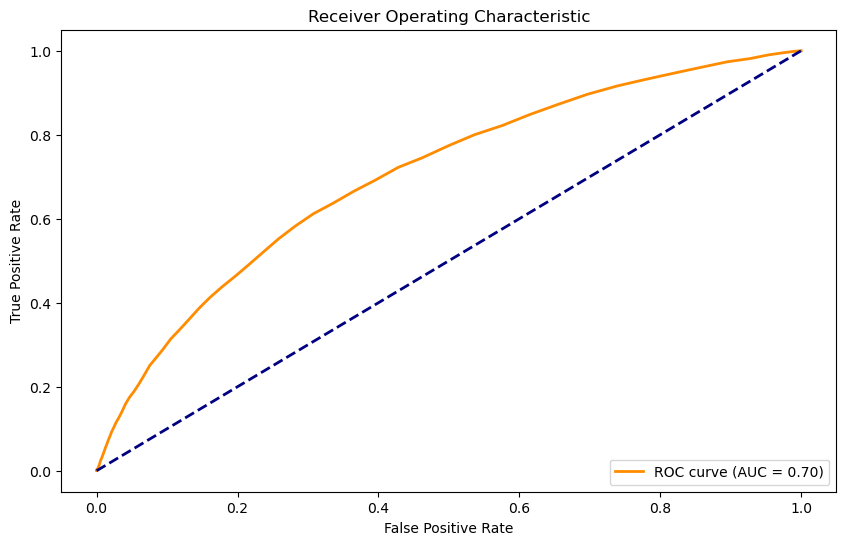

In [241]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


## Business Implications

### Enhanced Risk Management: Identify high-risk applicants early to mitigate loan defaults. 

### Optimized Loan Approvals: Increase approval rates for low-risk applicants while maintaining profitability. 

### Data-Driven Decisioning: Use model insights to guide policy adjustments and product offerings.
